# Quick Start Pymrio Tutorial using WIOD

This notebook contains the interactive version of the quick start given in the Pymrio article [(Stadler et al 2018 sub)](https://github.com/konstantinstadler/pymrio_article).

Pymrio requires a Python version >= 3.6. If you don't have Python installed, I recommend to use the [Anaconda Scientific Python package](https://www.anaconda.com/download).

Pymrio is available on 

<a href=https://badge.fury.io/py/pymrio>
<img src="https://badge.fury.io/py/pymrio.svg" alt="the Python Package Index PyPI" align=left>
</a>
<br>


and on

<a href=https://anaconda.org/konstantinstadler/pymrio>
<img src="https://anaconda.org/konstantinstadler/pymrio/badges/version.svg" alt="Anaconda Cloud" align=left>
</a>
<br>

Thus, two possibilities exist to install Pymrio and all required packages. 

For using the version on PyPI use:

```
pip install pymrio --upgrade
```

To install from the Anaconda Cloud do:

```
conda install -c konstantinstadler pymrio
```

Further down in that notebood we will also use the [country_converter](https://github.com/konstantinstadler/country_converter) package as well as [seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/) for some plotting. You can install these packages with pip or conda analog to pymrio. Alternatively, you can also run this notebook in the cloud via binder following this link:

[![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=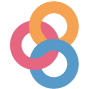)](https://mybinder.org/v2/gh/konstantinstadler/pymrio_article/master?filepath=%2Fnotebook%2Fpymrio-tutorial-for-wiod.ipynb)


You can than import the Pymrio package with

In [1]:
import pymrio

In this example here, we will use the [WIOD MRIO database](http://www.wiod.org/home).

First, the Pymrio MRIO download function is used to get the WIOD MRIO database with:

In [2]:
raw_wiod_path = '/tmp/wiod/raw'
pymrio.download_wiod2013(storage_folder=raw_wiod_path,
                         years=[2008])

Description: WIOD metadata file for pymrio
MRIO Name: WIOD
System: IxI
Version: data13
File: /tmp/wiod/raw/metadata.json
History:
20201120 14:24:19 - FILEIO -  Downloaded http://www.wiod.org/protected3/data13/water/wat_may12.zip to wat_may12.zip
20201120 14:24:19 - FILEIO -  Downloaded http://www.wiod.org/protected3/data13/materials/mat_may12.zip to mat_may12.zip
20201120 14:24:18 - FILEIO -  Downloaded http://www.wiod.org/protected3/data13/land/lan_may12.zip to lan_may12.zip
20201120 14:24:17 - FILEIO -  Downloaded http://www.wiod.org/protected3/data13/AIR/AIR_may12.zip to AIR_may12.zip
20201120 14:24:17 - FILEIO -  Downloaded http://www.wiod.org/protected3/data13/CO2/CO2_may12.zip to CO2_may12.zip
20201120 14:24:16 - FILEIO -  Downloaded http://www.wiod.org/protected3/data13/EM/EM_may12.zip to EM_may12.zip
20201120 14:24:15 - FILEIO -  Downloaded http://www.wiod.org/protected3/data13/EU/EU_may12.zip to EU_may12.zip
20201120 14:24:14 - FILEIO -  Downloaded http://www.wiod.org/protecte

This downloads the 2008 MRIO table from WIOD. Omitting the year parameter would result getting all years.
The function returns a Pymrio meta data object, which gives information about the WIOD version, system (in this case industry by industry) and records about from where the data was received.

To parse the database into a Pymrio object use:

In [3]:
wiod = pymrio.parse_wiod(raw_wiod_path, year=2008)

The available data can be explored by for example:

In [4]:
wiod.get_sectors()

Index(['AtB', 'C', '15t16', '17t18', '19', '20', '21t22', '23', '24', '25',
       '26', '27t28', '29', '30t33', '34t35', '36t37', 'E', 'F', '50', '51',
       '52', 'H', '60', '61', '62', '63', '64', 'J', '70', '71t74', 'L', 'M',
       'N', 'O', 'P'],
      dtype='object', name='sector')

or

In [5]:
wiod.get_regions()

Index(['AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHN', 'CYP', 'CZE', 'DEU',
       'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IDN', 'IND',
       'IRL', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'MLT', 'NLD',
       'POL', 'PRT', 'ROU', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR', 'TWN', 'USA',
       'RoW'],
      dtype='object', name='region')

In [6]:
wiod.Z

region                 AUS                                                     \
sector                 AtB            C         15t16       17t18          19   
region sector                                                                   
AUS    AtB     4445.324330    41.919400  15625.681890  536.968630  154.395870   
       C         16.277934  3838.070873    189.934275   11.313686    3.253063   
       15t16   1049.495726   100.611347   6754.110522   68.387761   19.663697   
       17t18     36.908420    43.779214    108.986668  355.675875  102.268333   
       19         9.518107    11.289978     28.105965   91.723266   26.373410   
...                    ...          ...           ...         ...         ...   
RoW    L          0.547432     0.780406      1.176073    0.200903    0.057766   
       M          1.319036     9.927575     11.742183    2.639874    0.759049   
       N          7.894845     0.291041     11.603507    2.279403    0.655404   
       O          1.244926     3.686620      4.381357    0.155217    0.044633   
       P          0.001018     0.000104      0.003666    0.000135    0.000039   

region                                                                     \
sector                 20       21t22           23          24         25   
region sector                                                               
AUS    AtB     936.835140  273.018600     0.000000  215.708440  93.909230   
       C        14.271582   58.136067  4424.333299  193.328895  20.968263   
       15t16    14.570366   49.431980    36.266290  835.587643  54.070009   
       17t18    18.335691   50.188234    15.538649   45.917943  45.612614   
       19        4.728489   12.942764     4.007176   11.841522  11.762783   
...                   ...         ...          ...         ...        ...   
RoW    L         0.248589    0.636937     0.238198    1.078893   0.160527   
       M         1.003295    4.474255     4.120725    4.517280   1.687657   
       N         1.749095    6.793279     0.164896   18.550374   0.174962   
       O         0.562692    2.533730     0.758305    2.141030   0.484539   
       P         0.000031    0.000096     0.000021    0.000116   0.000052   

region         ...          RoW                                         \
sector         ...           63           64            J           70   
region sector  ...                                                       
AUS    AtB     ...    19.761917     0.001627     0.140044     0.043667   
       C       ...     0.211888     0.034300     0.005817     0.088101   
       15t16   ...     1.621756     1.588110     3.701685     2.743954   
       17t18   ...     0.401032     0.181367     1.492579     0.632427   
       19      ...     0.039708     0.017958     0.147786     0.062619   
...            ...          ...          ...          ...          ...   
RoW    L       ...   608.700335   709.004146  1595.531658   620.253937   
       M       ...    91.678620   463.402398  1802.804212   212.193133   
       N       ...    39.843405   106.735687   305.274672    70.364956   
       O       ...  5414.944076  4371.240663  5815.525102  2897.014578   
       P       ...     1.324062     0.244611     1.104726     1.141934   

region                                                               \
sector                71t74             L            M            N   
region sector                                                         
AUS    AtB        11.680006      3.113827    61.711687     9.898359   
       C          14.418832      0.315809     0.182157     0.273387   
       15t16      27.665274     14.865583    86.096798    46.736852   
       17t18       1.492750      6.550554     0.878764     2.252624   
       19          0.147803      0.648594     0.087010     0.223040   
...                     ...           ...          ...          ...   
RoW    L        1194.982705   4557.146576   518.488155   921.621306   
       M        1571.999239   7706.6763

WIOD includes several satellite accounts, which are stored as child objects in Pymrio. 
For example, in order to see the AIR emissions provided by WIOD:



In [7]:
wiod.AIR.F


region             AUS                                             \
sector             AtB             C          15t16         17t18   
stressor                                                            
CO2       6.471152e+03  2.331841e+04    3256.861259    392.819896   
CH4       3.226169e+06  1.370016e+06    1221.450093     41.723574   
N2O       6.527106e+04  1.243851e+02     527.652440     10.773378   
NOX       2.000881e+05  1.709849e+05   70375.533177   3875.234721   
SOX       1.976645e+04  4.713841e+04   45815.675397   1068.354291   
CO        1.496859e+06  7.159254e+05  227663.413138  16225.875707   
NMVOC     3.824729e+05  2.409498e+05  141642.740887   5460.933412   
NH3       4.049434e+05  4.575323e+02     112.157985      4.313657   

region                                                            \
sector             19            20         21t22             23   
stressor                                                           
CO2         91.570641    147.075293   2100.167306    7928.850694   
CH4          6.112471     64.722688    189.787544   33785.867211   
N2O          1.335362     14.793543    111.798406     146.523698   
NOX        964.709338   9146.373832  36269.747108   18894.321469   
SOX        265.958435   2521.542160  26680.445075  150018.069958   
CO        4039.304699  38296.499606  82187.571692   56833.653485   
NMVOC     1359.456610  12888.958231  28691.901753   65893.299291   
NH3          0.449874     13.342974     48.333137       4.143371   

region                                ...           RoW                 \
sector               24           25  ...            63             64   
stressor                              ...                                
CO2         8832.607331    82.623337  ...  4.530961e+04   23843.716275   
CH4          768.018325    22.631731  ...  2.031444e+04    2430.969769   
N2O        10421.185919     6.723839  ...  7.185897e+02     320.774141   
NOX        34546.808023   663.707765  ...  1.419601e+05   87411.639720   
SOX        91733.983039   182.976023  ...  6.973313e+04   42938.026115   
CO        393632.686253  2778.990301  ...  1.385415e+06  853066.323392   
NMVOC     105133.073315   935.288872  ...  3.377663e+05  207978.880902   
NH3          366.328954     4.740067  ...  4.569925e+02     324.340516   

region                                                              \
sector                J             70         71t74             L   
stressor                                                             
CO2        17594.617416   11774.769870  5.787274e+04  1.118612e+05   
CH4         3979.962245    5525.320218  1.617241e+04  8.865122e+04   
N2O          342.725185     215.478088  1.228492e+03  2.995831e+03   
NOX        68809.569199   60385.601411  2.027940e+05  4.224802e+05   
SOX        33800.385037   29662.394375  9.961571e+04  2.075292e+05   
CO        671525.284261  589314.228014  1.979104e+06  4.123062e+06   
NMVOC     163718.896513  143675.714632  4.825085e+05  1.005209e+06   
NH3          229.110878     244.663450  1.643215e+03  1.357458e+03   

region                                                    
sector                M             N             O    P  
stressor                                                  
CO2        25382.470248  4.575128e+04  4.851286e+04  0.0  
CH4         5001.012041  1.394311e+04  1.360473e+07  0.0  
N2O          272.108324  7.680525e+03  9.170715e+04  0.0  
NOX        99579.016981  1.666314e+05  1.565510e+05  0.0  
SOX        48914.840693  8.185206e+04  7.690040e+04  0.0  
CO        971810.003503  1.626186e+06  1.527810e+06  0.0  
NMVOC     236928.772636  3.964667e+05  3.724824e+05  0.0  
NH3          113.829614  6.203676e+02  4.965187e+03  0.0  

[8 rows x 1435 columns]

WIOD, however, does neither provide any normalized data (A-matrix, satellite account coefficient data) nor any consumption based accounts (footprints).

In order to calculate them, one could go through all the missing data and compute each account. 
Pymrio provides the required function, for example to calculate the A-matrix:


In [8]:
x = pymrio.calc_x(Z=wiod.Z, Y=wiod.Y)
A = pymrio.calc_A(Z=wiod.Z, x=x)

In [9]:
A.head()

region              AUS                                                    \
sector              AtB         C     15t16     17t18        19        20   
region sector                                                               
AUS    AtB     0.095452  0.000346  0.220811  0.086780  0.096757  0.093637   
       C       0.000350  0.031718  0.002684  0.001828  0.002039  0.001426   
       15t16   0.022535  0.000831  0.095444  0.011052  0.012323  0.001456   
       17t18   0.000793  0.000362  0.001540  0.057481  0.064090  0.001833   
       19      0.000204  0.000093  0.000397  0.014824  0.016528  0.000473   

region                                                 ...           RoW  \
sector            21t22        23        24        25  ...            63   
region sector                                          ...                 
AUS    AtB     0.009559  0.000000  0.008643  0.008967  ...  1.143737e-04   
       C       0.002035  0.220910  0.007746  0.002002  ...  1.226316e-06   
       15t16   0.001731  0.001811  0.033481  0.005163  ...  9.386042e-06   
       17t18   0.001757  0.000776  0.001840  0.004355  ...  2.321002e-06   
       19      0.000453  0.000200  0.000474  0.001123  ...  2.298108e-07   

region                                                                 \
sector                   64             J            70         71t74   
region sector                                                           
AUS    AtB     5.153717e-09  2.285107e-07  7.786856e-08  1.517644e-05   
       C       1.086802e-07  9.492337e-09  1.571046e-07  1.873514e-05   
       15t16   5.031958e-06  6.040074e-06  4.893121e-06  3.594692e-05   
       17t18   5.746660e-07  2.435455e-06  1.127767e-06  1.939607e-06   
       19      5.689976e-08  2.411432e-07  1.116643e-07  1.920475e-07   

region                                                                 \
sector                    L             M             N             O   
region sector                                                           
AUS    AtB     4.463792e-06  1.377724e-04  2.552552e-05  2.604967e-05   
       C       4.527246e-07  4.066696e-07  7.050016e-07  1.253368e-06   
       15t16   2.131039e-05  1.922126e-04  1.205233e-04  2.022545e-04   
       17t18   9.390472e-06  1.961856e-06  5.808983e-06  6.168260e-06   
       19      9.297846e-07  1.942504e-07  5.751684e-07  6.107418e-07   

region                       
sector                    P  
region sector                
AUS    AtB     6.252650e-09  
       C       1.432423e-07  
       15t16   1.013494e-06  
       17t18   1.759452e-07  
       19      1.742097e-08  

[5 rows x 1435 columns]

Alternatively, Pymrio provides a function which iterates through all missing accounts and calculates them:

In [10]:
wiod.calc_all()

At this point, a basic EE MRIO analysis is accomplished. For example, the regional consumption based accounts of the AIR emissions are now given by:

In [11]:
wiod.AIR.D_cba_reg

region,AUS,AUT,BEL,BGR,BRA,CAN,CHN,CYP,CZE,DEU,...,PRT,ROU,RUS,SVK,SVN,SWE,TUR,TWN,USA,RoW
stressor,,,,,,,,,,,,,,,,,,,,,
CO2,4.404070e+05,1.022100e+05,1.586176e+05,42924.986975,4.059629e+05,5.659664e+05,5.031700e+06,13943.187686,108758.745642,1.054136e+06,...,7.658922e+04,1.173831e+05,1.311461e+06,40459.233377,24251.728341,9.434506e+04,3.494179e+05,2.246294e+05,6.210161e+06,5.620778e+06
CH4,4.275465e+06,7.599975e+05,1.030354e+06,464018.748607,1.352464e+07,4.068558e+06,5.433871e+07,157009.091900,780222.089424,6.668537e+06,...,8.948877e+05,1.344168e+06,1.532052e+07,411099.098085,182504.004554,7.352664e+05,3.652537e+06,1.104729e+06,3.917121e+07,7.560548e+07
N2O,9.588178e+04,3.086814e+04,4.609171e+04,13203.713081,5.899229e+05,1.634371e+05,1.831795e+06,3200.309665,27441.728571,2.914646e+05,...,3.091511e+04,5.163863e+04,4.422776e+05,13658.674182,7011.741463,3.576881e+04,9.538255e+04,3.551477e+04,1.182906e+06,3.590470e+06
NOX,2.359815e+06,3.324339e+05,4.508892e+05,142917.818720,2.786076e+06,1.904551e+06,1.925370e+07,35972.513098,292246.717821,2.701648e+06,...,3.025544e+05,3.380263e+05,4.444685e+06,125333.624730,73379.182597,3.524920e+05,1.797639e+06,8.632669e+05,1.845556e+07,3.504645e+07
SOX,2.399335e+06,1.983047e+05,3.702525e+05,400357.951750,1.699074e+06,2.088103e+06,3.245490e+07,43500.967386,225907.785277,1.951840e+06,...,1.918064e+05,4.979996e+05,1.398364e+06,103186.610826,48180.228365,2.078760e+05,1.548830e+06,1.075249e+06,1.523013e+07,2.860410e+07
CO,2.173900e+07,1.371366e+06,2.167114e+06,703172.284772,2.681292e+07,7.525147e+06,9.904520e+07,144686.477852,829881.093571,1.099191e+07,...,1.194956e+06,2.055640e+06,2.165403e+07,455232.910264,580264.681074,2.048666e+06,4.860666e+06,4.927789e+06,1.005814e+08,3.566157e+08
NMVOC,3.101630e+06,3.582680e+05,5.920832e+05,190582.650539,5.323333e+06,2.131757e+06,2.016103e+07,43518.270216,273912.655126,2.923060e+06,...,4.003833e+05,6.065405e+05,4.179851e+06,138654.031320,142881.841642,5.666544e+05,1.738178e+06,1.095519e+06,2.095710e+07,4.208942e+07
NH3,3.851776e+05,9.254548e+04,1.245648e+05,45897.394639,1.345046e+06,4.204562e+05,6.415339e+06,8931.594745,67224.140441,8.505438e+05,...,8.987684e+04,1.911781e+05,7.889417e+05,35515.968170,23476.633339,8.488958e+04,5.979386e+05,1.032068e+05,3.090159e+06,8.572543e+06


In [12]:
wiod.AIR.unit

unit,unit
stressor,
CO2,Gg
CH4,t
N2O,t
NOX,Unnamed: 0
SOX,Unnamed: 0
CO,t
NMVOC,t
NH3,t


Pymrio can be linked with the [country converter coco](http://joss.theoj.org/papers/af694f2e5994b8aacbad119c4005e113) to ease the aggregation of MRIO and results into different classifications.
Using the country converter, WIOD can be aggregated into EU and non-EU countries with singling out Germany by:

In [13]:
import country_converter as coco
wiod.aggregate(region_agg = coco.agg_conc(original_countries='WIOD',
                                          aggregates=[{'DEU': 'DEU', 'GBR':'GBR'}, 'EU'],
                                          missing_countries='Other',
                                          merge_multiple_string=None))


We rename the EU account to reflect that is does not include Germany:

In [14]:
wiod.rename_regions({'EU':'Rest of EU'})

The regional footprint account are now:

In [15]:
wiod.AIR.D_cba_reg

region,Other,Rest of EU,DEU,GBR
stressor,,,,
CO2,2.436179e+07,3.472823e+06,1.054136e+06,7.397044e+05
CH4,2.540661e+08,2.711250e+07,6.668537e+06,5.235498e+06
N2O,9.705186e+06,1.128531e+06,2.914646e+05,2.118832e+05
NOX,1.043111e+08,1.093267e+07,2.701648e+06,2.164933e+06
SOX,1.037493e+08,8.344435e+06,1.951840e+06,1.421854e+06
CO,7.661455e+08,5.466639e+07,1.099191e+07,1.068169e+07
NMVOC,1.280392e+08,1.577316e+07,2.923060e+06,2.986943e+06
NH3,2.672782e+07,3.493227e+06,8.505438e+05,5.900984e+05


To visualize for example the CH4 accounts:

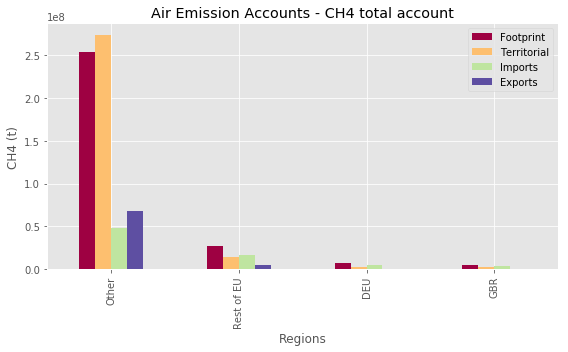

In [16]:
import matplotlib.pyplot as plt
with plt.style.context('ggplot'):
    wiod.AIR.plot_account('CH4', figsize=(8,5))
    plt.savefig('/tmp/wiod/airch4.png', dpi=300)
    plt.show()

To calculate the source (in terms of regions and sectors) of a certain stressor or impact driven by consumption, one needs to diagonalize this stressor/impact. This can be done with Pymrio by:

In [17]:
diag_CH4 = wiod.AIR.diag_stressor('CH4')

and be reassigned to the aggregated WIOD system:

In [18]:
wiod.CH4_source = diag_CH4

In the next step the automatic calculation routine of Pymrio is called again to compute the missing accounts in this new extension:
and be reassigned to the aggregated WIOD system:

In [19]:
wiod.calc_all()

The diagonalized CH4 data now shows the source and destination of the specified stressor (CH4):

In [20]:
wiod.CH4_source.D_cba.head()

region                Other                                            \
sector                  AtB             C         15t16         17t18   
region sector                                                           
Other  AtB     6.120041e+07  8.455234e+04  3.658411e+07  2.988418e+06   
       C       1.008359e+06  6.714292e+06  2.047332e+06  6.420307e+05   
       15t16   3.968202e+03  6.218228e+01  8.736127e+04  5.178453e+02   
       17t18   9.369869e+01  2.287802e+01  2.464623e+02  1.185856e+04   
       19      5.587156e+00  1.040420e+00  1.268140e+01  1.252185e+02   

region                                                                    \
sector                    19             20          21t22            23   
region sector                                                              
Other  AtB     867172.684194  230646.602537  441913.627992  1.766666e+05   
       C       117665.005135   33160.714629  281538.575874  5.643346e+06   
       15t16      639.802755      24.298048     128.945944  1.099366e+02   
       17t18      200.126039       4.500219      68.017013  3.330082e+01   
       19        1231.987687       0.344568       4.205279  1.580128e+00   

region                                      ...          GBR               \
sector                   24             25  ...           63           64   
region sector                               ...                             
Other  AtB     6.045454e+05  197135.975631  ...   669.903691  3406.973739   
       C       1.564758e+06  231675.430540  ...  1405.758158  9357.742729   
       15t16   4.216024e+02      83.091425  ...     0.460965     3.215184   
       17t18   7.862589e+01      59.680321  ...     0.093075     0.848278   
       19      4.194052e+00       3.043624  ...     0.008632     0.117312   

region                                                                \
sector                    J            70        71t74             L   
region sector                                                          
Other  AtB      8805.678036   6656.233633  4123.121986  19984.727842   
       C       20287.540899  18680.219527  8586.783042  49408.298618   
       15t16       8.818689      5.805941     3.871073     18.671491   
       17t18       1.738428      1.444981     0.919367      6.608830   
       19          0.225215      0.171093     0.106037      1.104701   

region                                                             
sector                    M             N             O         P  
region sector                                                      
Other  AtB      9398.054711  44359.672517  12305.895420  3.055303  
       C       15853.401016  93562.146555  23512.720979  4.041194  
       15t16       8.695184     44.370659     11.707402  0.001748  
       17t18       2.031215     12.658218      3.765588  0.001256  
       19          0.343349      1.430827      0.646012  0.000075  

[5 rows x 140 columns]

In this square footprint matrix, every column represents the amount of stressor occurring in each region - sector driven by the consumption stated in the column header. Conversly, each row states where the stressor impacts occurring in the row are distributed due (from where they are driven).

In [21]:
CH4_source_reg = wiod.CH4_source.D_cba.groupby(
    level='region', axis=0).sum().groupby(
    level='region', axis=1).sum()


In [22]:
CH4_source_reg

region,DEU,GBR,Other,Rest of EU
region,,,,
DEU,1.485343e+06,4.634238e+04,2.892830e+05,3.819713e+05
GBR,5.139252e+04,1.833541e+06,2.112405e+05,1.879226e+05
Other,3.696832e+06,2.711860e+06,2.457410e+08,1.317725e+07
Rest of EU,7.402886e+05,4.186665e+05,1.756700e+06,1.128755e+07


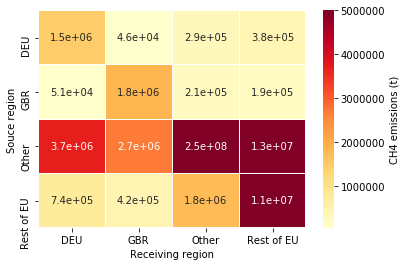

In [23]:
import seaborn as sns
CH4_source_reg.columns.name = 'Receiving region'
CH4_source_reg.index.name = 'Souce region'
sns.heatmap(CH4_source_reg, vmax=5E6, 
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={'label': 'CH4 emissions ({})'.format(wiod.CH4_source.unit.unit[0])})
plt.savefig('/tmp/wiod/airch4_source_reg.png', dpi=300)
plt.show()

Storing the MRIO database can be done with 

In [24]:
storage_path = '/tmp/wiod/aly'
wiod.save_all(storage_path)

From where it can be received subsequently by:

In [25]:
wiod = pymrio.load_all(storage_path)

The meta attribute of Pymrio mentioned at the beginning kept track of all modifications of the system.
This can be shown with:

In [26]:
wiod.meta

Description: WIOD metadata file for pymrio
MRIO Name: WIOD
System: industry-by-industry
Version: data13
File: /tmp/wiod/aly/metadata.json
History:
20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/factor_inputs
20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/SEA
20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/AIR
20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/CO2
20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/EM
20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/EU
20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/lan
20201120 14:50:10 - FILEIO -  Added satellite account from /tmp/wiod/aly/mat
20201120 14:50:10 - FILEIO -  Added satellite account from /tmp/wiod/aly/wat
20201120 14:50:10 - FILEIO -  Added satellite account from /tmp/wiod/aly/CH4_source
 ... (more lines in history)

Custom notes can be added to the meta with:

In [27]:
wiod.meta.note("Custom note")

The history of the meta data can be filtered for specific entries like:

In [28]:
wiod.meta.file_io_history

['20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/factor_inputs',
 '20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/SEA',
 '20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/AIR',
 '20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/CO2',
 '20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/EM',
 '20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/EU',
 '20201120 14:50:11 - FILEIO -  Added satellite account from /tmp/wiod/aly/lan',
 '20201120 14:50:10 - FILEIO -  Added satellite account from /tmp/wiod/aly/mat',
 '20201120 14:50:10 - FILEIO -  Added satellite account from /tmp/wiod/aly/wat',
 '20201120 14:50:10 - FILEIO -  Added satellite account from /tmp/wiod/aly/CH4_source',
 '20201120 14:50:10 - FILEIO -  Loaded IO system from /tmp/wiod/aly',
 '20201120 14:50:10 - FILEIO -  Saved WIOD to /tmp/wiod/aly',
 '20201120 14:50:05 - FILEIO -  Extension w

This tutorial gave a short overview about the basic functionality of Pymrio. For more information about the capabilities of pymrio check the [online documentation](http://pymrio.readthedocs.io/en/latest/index.html).

<a href=https://creativecommons.org/licenses/by/4.0/>
<img src="https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg" alt="CC-BY4.0 licence" align=right>
</img>
</a>
<br>
<div style="text-align: right"> Licences of underlying dataset and software apply. </div>